[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            product_name product_price Rate  \
0                    Tanunni Mobile Holder Mobile Holder           171    4   
1      CMerchants Multi Organiser BLue4 Book Shelf Me...           625    1   
2      RIAN Animal Single Mink Blanket for  Mild Wint...           599    5   
3      cello ColourUp Hobby Bag of Assorted Stationer...           449    5   
4      Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...           218    5   
...                                                  ...           ...  ...   
62631                             Bajaj DX 2 LW Dry Iron           529    3   
62632  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...          8499    4   
62633  MILTON Thermosteel Flip Lid 500 ml FlaskPack o...           648    5   
62634  POCO C31 (Royal Blue, 64 GB)?ÐÒÐÒ?ÐÒÐÒ...          7499    5   
62635  Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...         13999    5   

                 Review                            

C:\Users\nh013\AppData\Local\Temp\ipykernel_7940\1931190884.py:73: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.tight_layout()
C:\Users\nh013\AppData\Local\Temp\ipykernel_7940\1931190884.py:73: UserWarning: Glyph 147 (\x93) missing from current font.
  plt.tight_layout()
C:\Users\nh013\AppData\Local\Temp\ipykernel_7940\1931190884.py:73: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
C:\Users\nh013\AppData\Local\Temp\ipykernel_7940\1931190884.py:73: UserWarning: Glyph 157 (\x9d) missing from current font.
  plt.tight_layout()
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:15

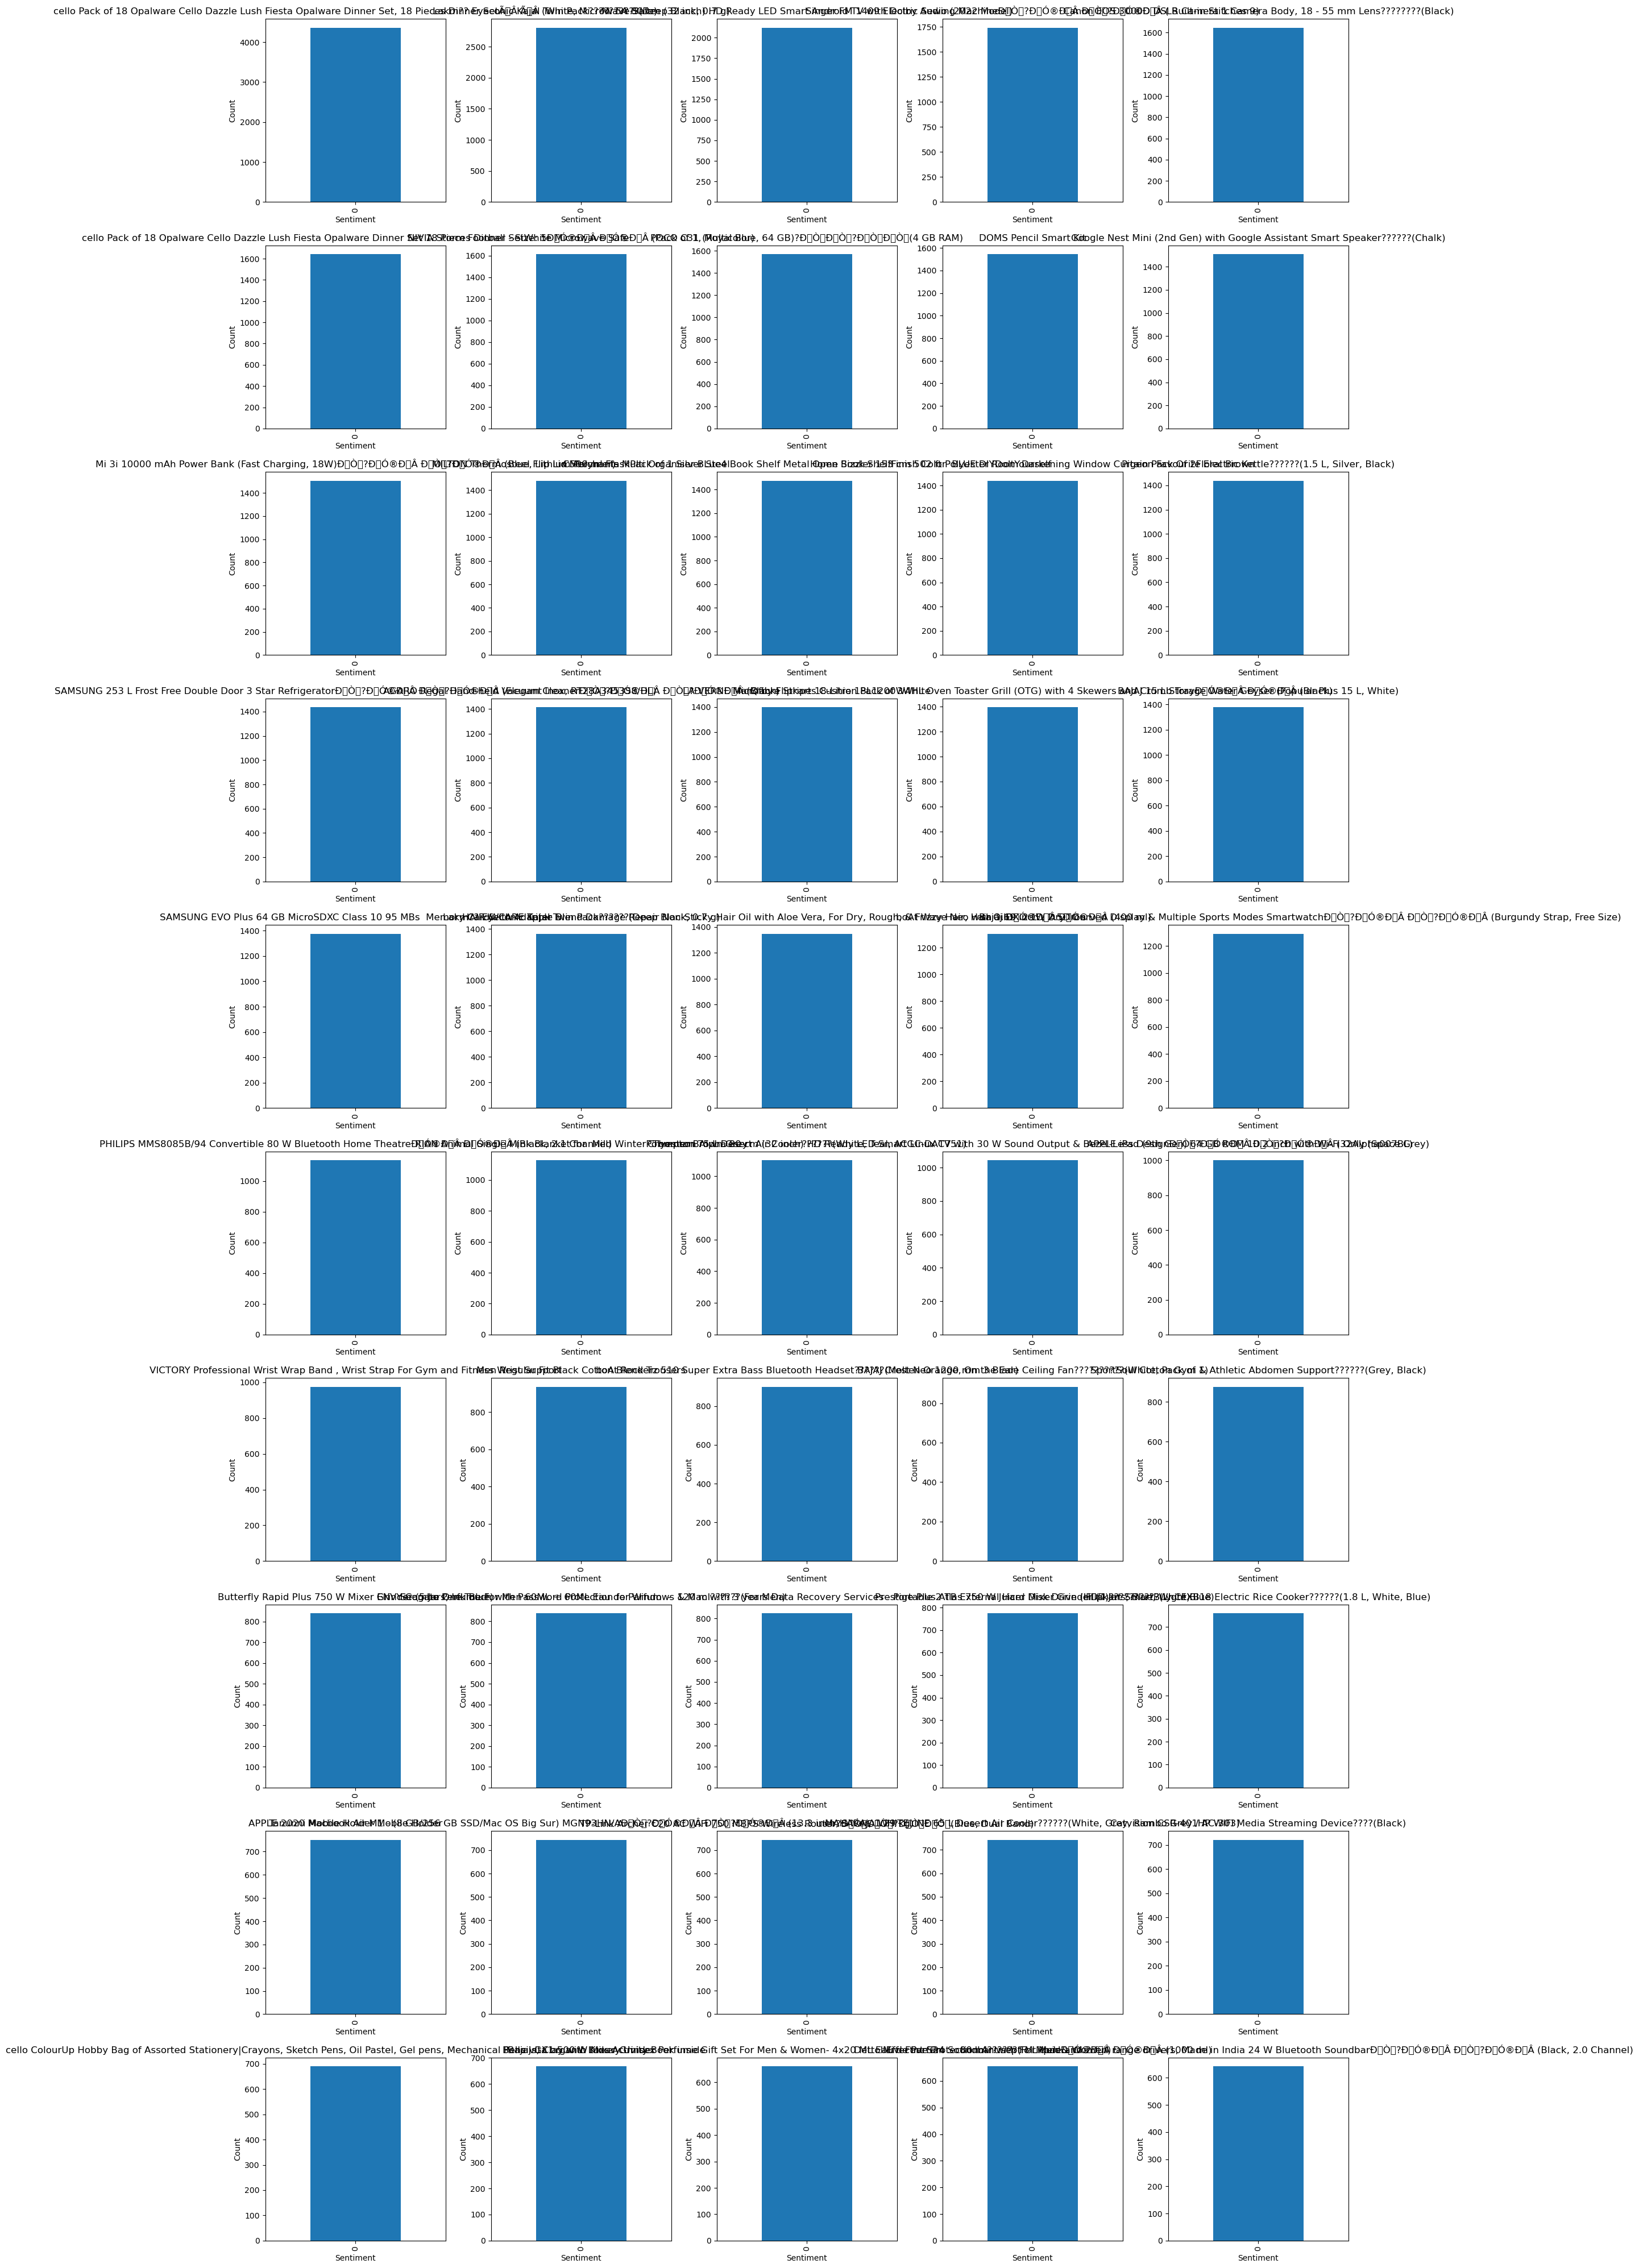

In [2]:
#this code  preprocesses the text data by removing missing values, duplicates, URLs, special characters, stop words, 
#and applying stemming.



import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['Review'] = df['Review'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Assign labels to sentiments (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Get the top 50 products based on the number of reviews
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# Create a new dataframe with only the top products
df_top_products = df[df['product_name'].isin(top_products)]

# Shuffle the rows of the dataframe
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)



# Print the resulting dataframe
print(df_top_products)


# Count the number of positive and negative reviews for each product
product_sentiment_counts = df_top_products.groupby(['product_name', 'Sentiment']).size().unstack(fill_value=0)

# Plot the sentiment distribution for each product
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(20, 40))

for i, product in enumerate(top_products):
    row = i // 5
    col = i % 5
    ax = axs[row, col]
    product_sentiment_counts.loc[product].plot(kind='bar', ax=ax, title=product)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            product_name product_price Rate  \
0      NIVIA Storm Football - Size: 5ÐÓ®ÐÂ ÐÓ®ÐÂ ...           429    5   
1                                  DOMS Pencil Smart Kit           449    5   
2      POCO C31 (Royal Blue, 64 GB)?ÐÒÐÒ?ÐÒÐÒ...          7499    1   
3      SportSoul Cotton Gym & Athletic Abdomen Suppor...           249    5   
4      APPLE iPad (9th Gen) 64 GB ROM 10.2 inch with ...         29990    5   
...                                                  ...           ...  ...   
62631                Tanunni Mobile Holder Mobile Holder           171    5   
62632                              DOMS Pencil Smart Kit           449    5   
62633  Pigeon Favourite Electric Kettle??????(1.5 L, ...           699    5   
62634  Google Nest Mini (2nd Gen) with Google Assista...          3499    4   
62635        Men Regular Fit Black Cotton Blend Trousers           409    2   

                  Review                           

C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


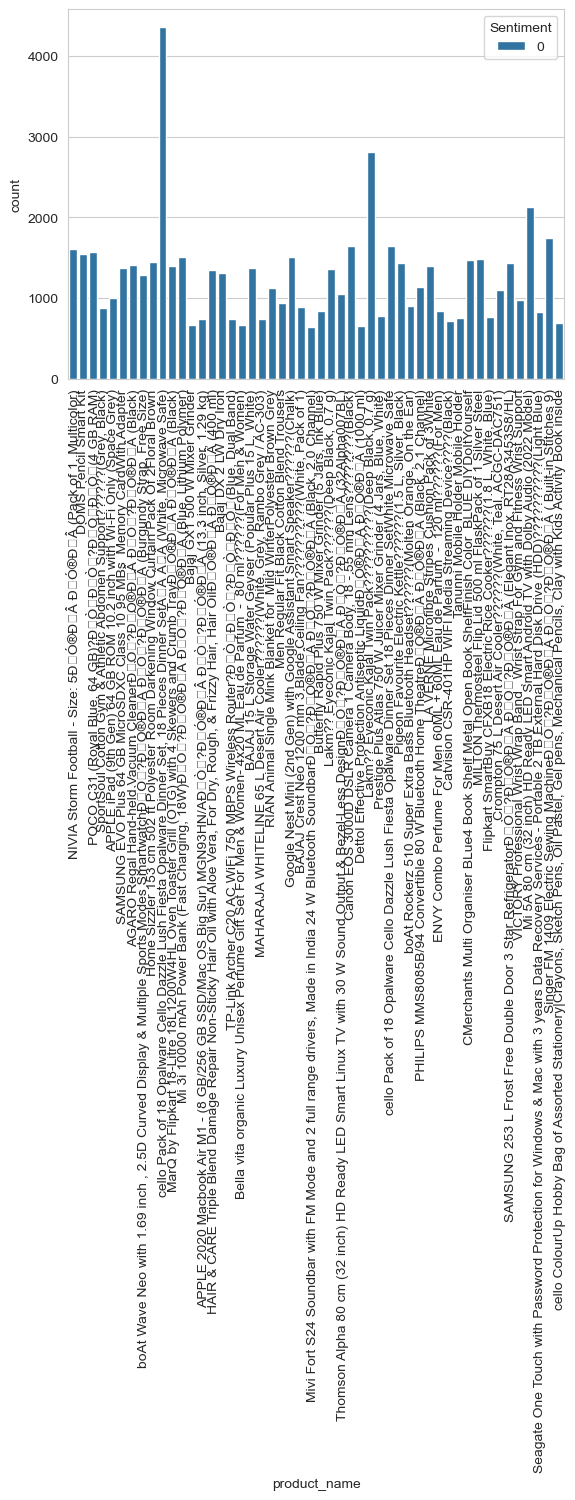

In [5]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['Review'] = df['Review'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Assign labels to sentiments (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Get the top 50 products based on the number of reviews
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# Create a new dataframe with only the top products
df_top_products = df[df['product_name'].isin(top_products)]

# Shuffle the rows of the dataframe
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)



# Print the resulting dataframe
print(df_top_products)


# Create a bar plot to show sentiment distribution for each product
sns.countplot(x='product_name', hue='Sentiment', data=df_top_products)
plt.xticks(rotation=90)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         product_name  product_price  \
49  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0   
22  Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0   
28  Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...        13999.0   
39  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...         8499.0   
10  Canon EOS 3000D DSLR Camera 1 Camera Body, 18 ...        30999.0   

    Sentiment  Review Count  
49        0.0          4362  
22        0.0          2805  
28        0.0          2122  
39        0.0          1743  
10        0.0          1646  
                                            product_name  product_price Rate  \
0      Dettol Effective Protection Antiseptic LiquidÐ...          349.0    5   
1      HAIR & CARE Triple Blend Damage Repair Non-Sti...          113.0    5   
2      cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0    5   
3      Dettol Effective Protection Antiseptic LiquidÐ...          3

C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


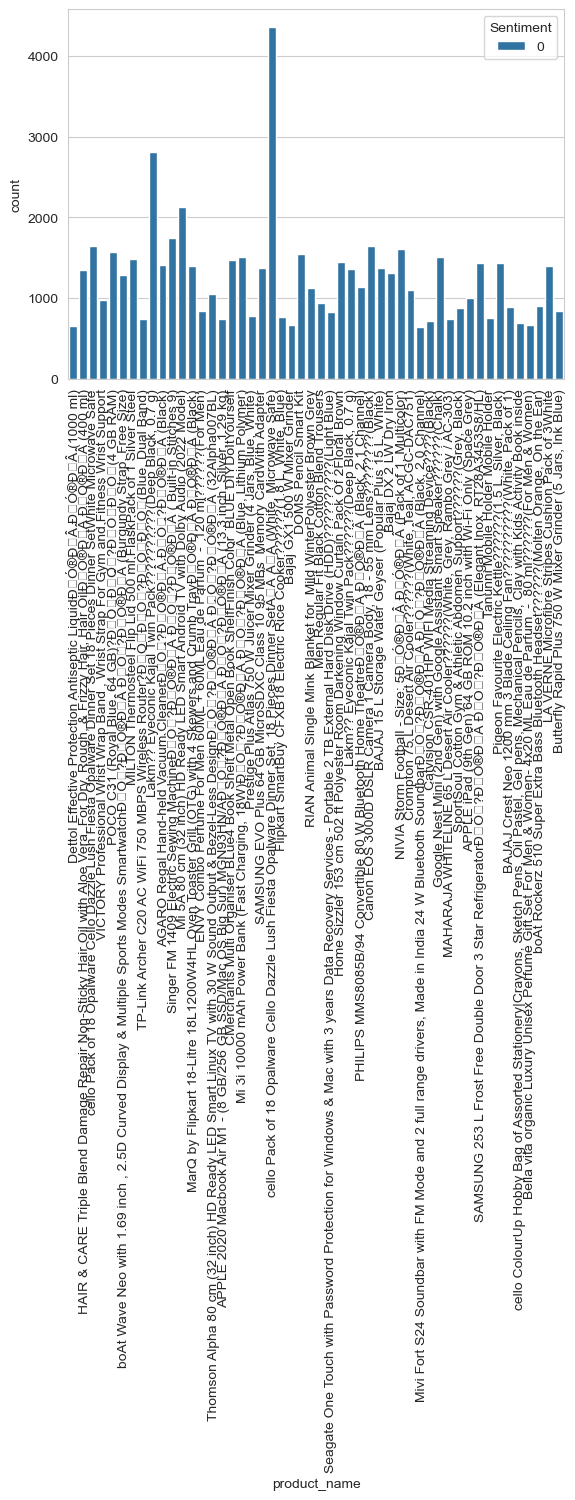

In [7]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['Review'] = df['Review'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Assign labels to sentiments (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Get the top 10 products based on the number of reviews
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# Create a new dataframe with only the top products
df_top_products = df[df['product_name'].isin(top_products)]

# Shuffle the rows of the dataframe
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)

# Convert the product_price column to numeric
df_top_products['product_price'] = pd.to_numeric(df_top_products['product_price'], errors='coerce')

# Find the best selling product name and price with sentiment
best_selling_product = df_top_products.groupby('product_name').agg({'product_price': 'mean', 'Sentiment': 'mean', 'Review': 'count'}).reset_index()
best_selling_product.rename(columns={'Review': 'Review Count'}, inplace=True)
best_selling_product.sort_values(by=['Review Count', 'Sentiment', 'product_price'], ascending=False, inplace=True)
print(best_selling_product.head())

# Print the resulting dataframe
print(df_top_products)

# Create a bar plot to show sentiment distribution for each product
sns.countplot(x='product_name', hue='Sentiment', data=df_top_products)
plt.xticks(rotation=90)
plt.show()